### Computer Science: Cramer's rule
###### by Hamed Shah-hosseini
Explanation at: https://www.pinterest.com/HamedShahHosseini/
<br>https://github.com/ostad-ai/Computer-Science

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
#could use np.linalg.det instead of det
# det implemented in previous post and brought here below
def cramer_rule(A,b):
    n=A.shape[0]
    x=np.zeros(n)
    detA=det(A)[0]  
    if detA==0:
        return None
    for i in range(n):
        Ai=A.copy()
        Ai[:,i]=b.copy()
        x[i]=det(Ai)[0]/detA
    return x

#--Computing determinant by converting 
#--the matrix C to to an upper triangular one
def det(C):
    A=C.copy().astype('float64')
    n=A.shape[0]
    signChange=1
    for ii in range(n-1):
        if A[ii,ii]==0:
            flag=False
            for j in range(ii+1,n):
                if A[j,ii]!=0:
                    A[ii],A[j]=A[j].copy(),A[ii].copy()
                    flag=True; signChange*=-1
                    break 
            if flag is False:
                continue
        for j in range(ii+1,n):
            if A[j,ii]!=0:
                landa=A[j,ii]/A[ii,ii]
                A[j,ii:]=A[j,ii:]-landa*A[ii,ii:]
    product=signChange
    for ii in range(n):
        product*=A[ii,ii]
    return product,A

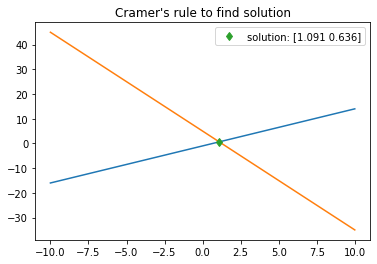

In [9]:
#-example to solve Ax=b for x
A=np.array([[3, -2],
            [4,1]    
            ],dtype='float')
b=np.array([2,5],dtype='float')
x=cramer_rule(A,b)
if x is not None: # has unique solution
    zs=np.linspace(-10,10,20)
    for (ai,bi),ci in zip(A,b):
        if bi!=0.:
            plt.plot(zs,(ci-ai*zs)/bi,'-')
        else:
            plt.plot([ci/ai]*zs.shape[0],zs,'-')
    plt.plot(x[0],x[1],'d',
    label=f'solution: {np.array_str(x,precision=3)}')
    plt.legend()
    plt.title('Cramer\'s rule to find solution')
    plt.show()
else:
    print('No solution or many solutions')